In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv('trawlers.csv')
df

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.252340e+12,1.325376e+09,0.000000,0.000000,0.0,153.000000,52.458649,4.581200,-1.0,gfw
1,1.252340e+12,1.325378e+09,0.000000,0.000000,0.0,153.000000,52.458668,4.581167,-1.0,gfw
2,1.252340e+12,1.325379e+09,0.000000,0.000000,0.0,153.000000,52.458633,4.581183,-1.0,gfw
3,1.252340e+12,1.325380e+09,0.000000,0.000000,0.0,153.000000,52.458649,4.581234,-1.0,gfw
4,1.252340e+12,1.325381e+09,0.000000,0.000000,0.0,153.000000,52.458649,4.581183,-1.0,gfw
...,...,...,...,...,...,...,...,...,...,...
4369096,1.838128e+14,1.480031e+09,172998.640625,239263.859375,11.2,166.800003,-42.847645,175.192535,-1.0,false_positives
4369097,1.838128e+14,1.480031e+09,173595.859375,240246.062500,11.7,163.100006,-42.853741,175.194473,-1.0,false_positives
4369098,1.838128e+14,1.480031e+09,174995.703125,241416.937500,11.2,168.699997,-42.860050,175.196487,-1.0,false_positives
4369099,1.838128e+14,1.480031e+09,174995.703125,241416.937500,11.5,169.100006,-42.863056,175.197464,-1.0,false_positives


In [3]:


# Drop rows where is_fishing is not 1 or 0
df = df[df['is_fishing'].isin([0, 1])]

# Drop unnecessary parameters
df.drop(df.columns.difference(['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon', 'is_fishing']), axis=1, inplace=True)

C:\Users\theva\AppData\Local\Temp\ipykernel_160\2249773709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns.difference(['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon', 'is_fishing']), axis=1, inplace=True)


In [4]:
# Drop rows with null values
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop('is_fishing', axis=1)
y = df['is_fishing']

X.head()

C:\Users\theva\AppData\Local\Temp\ipykernel_160\163380779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,distance_from_shore,distance_from_port,speed,course,lat,lon
60646,0.0,0.0,0.0,128.0,52.458717,4.581316
60647,0.0,0.0,0.0,128.0,52.458733,4.581316
60648,0.0,0.0,0.0,128.0,52.458698,4.581267
60649,0.0,0.0,0.0,128.0,52.458698,4.581234
60650,0.0,0.0,0.0,128.0,52.458683,4.581183


In [5]:
# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [9]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9511804721888756
F1 Score: 0.9313339229717778
Precision: 0.9322334004024145
Recall: 0.9304361796128203
Confusion Matrix:
[[21695   842]
 [  866 11583]]


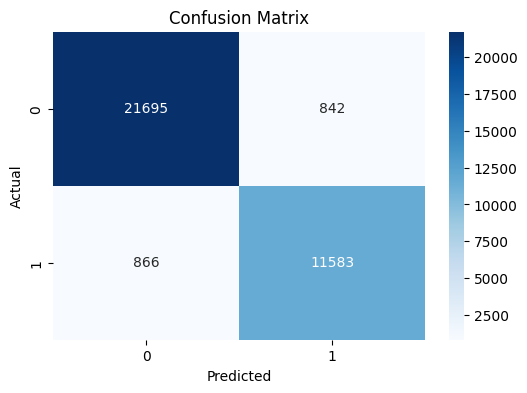

In [10]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

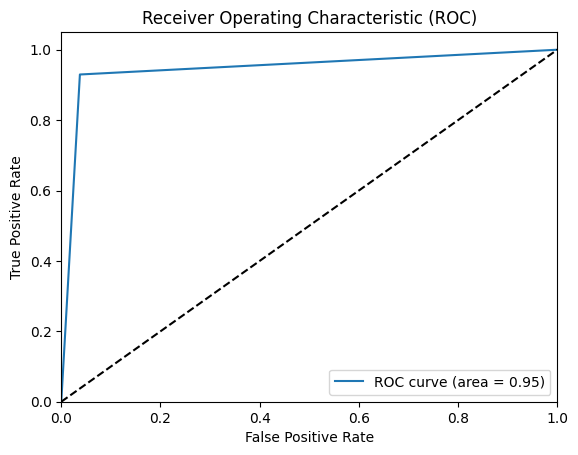

In [12]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [14]:
import joblib
joblib.dump(clf, 'decisionTree_model.pkl')


['decisionTree_model.pkl']